In [1]:
#Measuring and removing a rotation period signal from a light curve

In [2]:
import lightkurve as lk
import numpy as np
%matplotlib inline

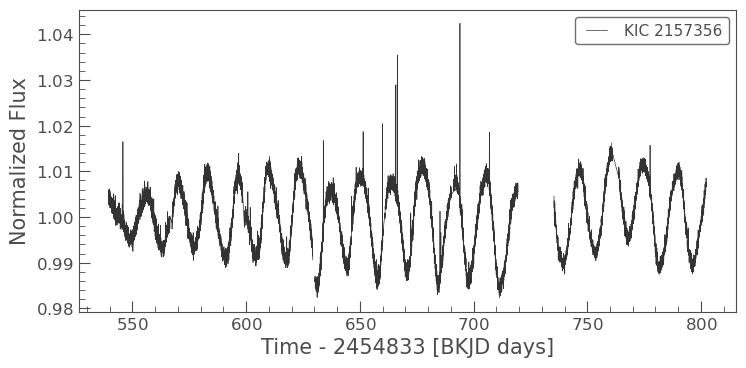

In [3]:
#Plotting the Light Curve of a Rotating Star KIC 2157356
search_result = lk.search_lightcurve('KIC 2157356', author='Kepler', quarter=(6, 7, 8))
lc = search_result.download_all().stitch()
lc.plot();

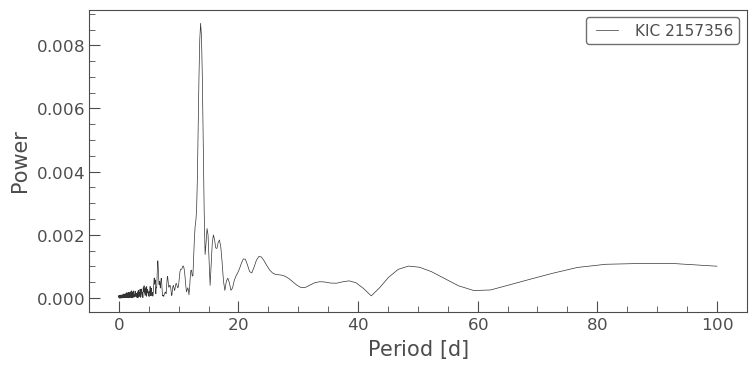

In [4]:
#Plotting the Periodogram
pg = lc.to_periodogram(maximum_period=100)
pg.plot(view='period');

In [5]:
pg.period_at_max_power

<Quantity 13.67086523 d>

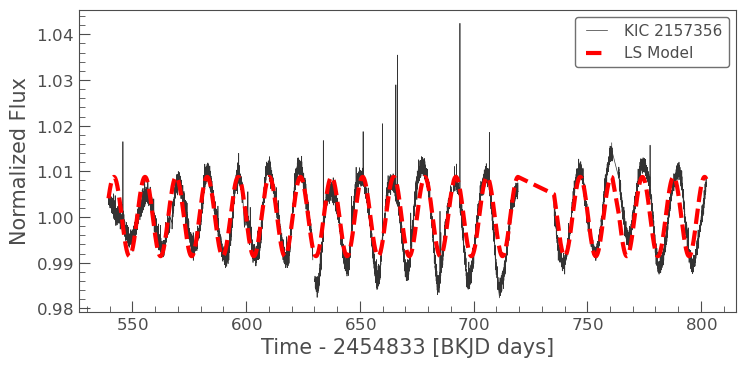

In [7]:
#Using the Lomb-Scargle Peridogram Method to Model
lc_model = pg.model(time=lc.time, frequency=pg.frequency_at_max_power)
ax = lc.plot()
lc_model.plot(ax=ax, lw=3, ls='--', c='red');

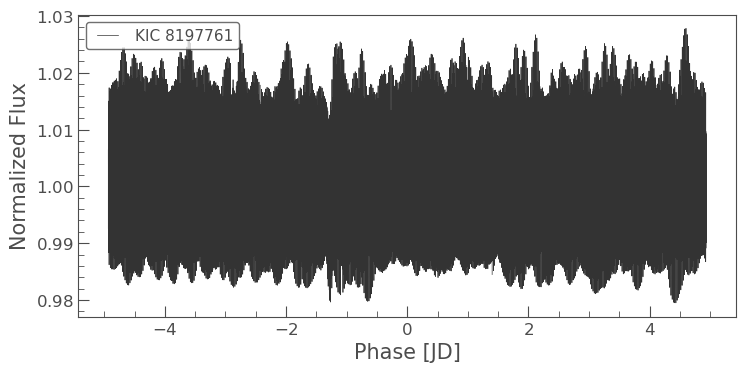

In [8]:
#Removing Periodic Signals Using Iterative Sine Fitting to KIC 8197761
search = lk.search_lightcurve('KIC 8197761', author='Kepler', cadence="long")
lc = search.download_all().stitch()
planet_period = 9.8686667
lc.fold(period=planet_period).plot();

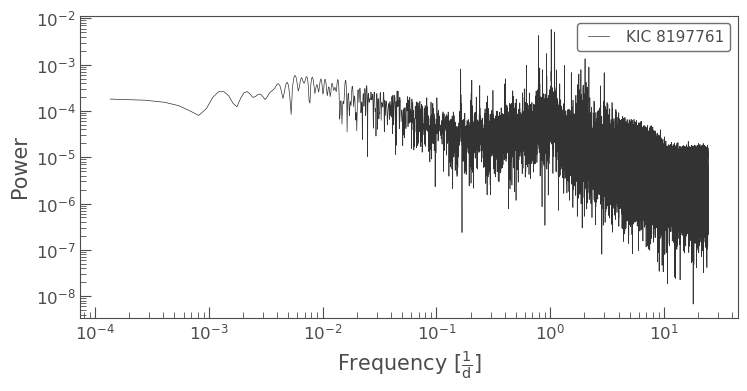

In [9]:
pg = lc.to_periodogram()
pg.plot(scale='log');

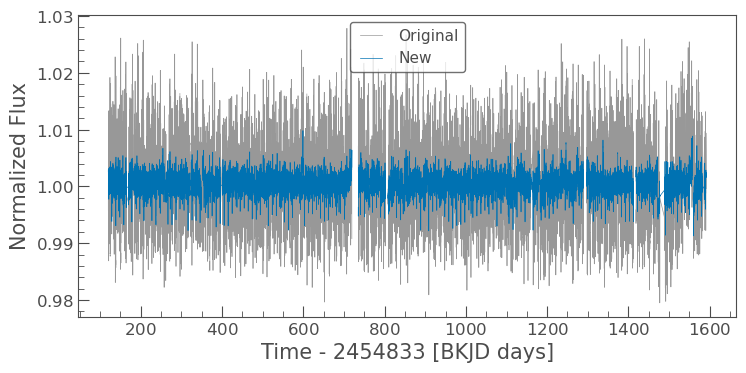

In [10]:
# Removing the signals associated with the 100 highest peaks
newlc = lc.copy()
for i in range(100):
  pg = newlc.to_periodogram()
  model = pg.model(time=newlc.time, frequency=pg.frequency_at_max_power)
  newlc.flux = newlc.flux / model.flux
ax = lc.plot(alpha=.5, label='Original');
newlc.plot(ax=ax, label='New');

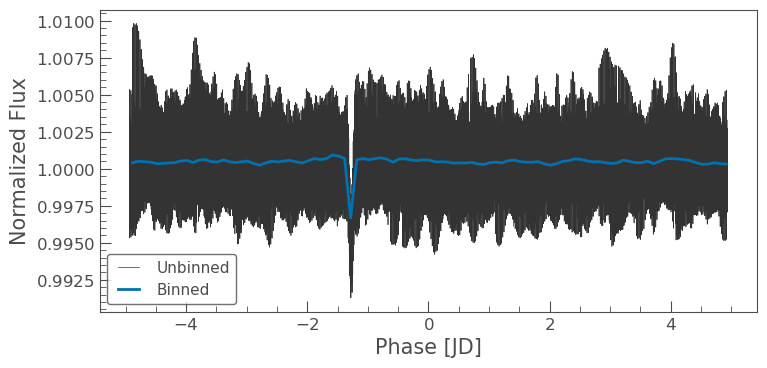

In [11]:
ax = newlc.fold(period=planet_period).plot(label='Unbinned')
newlc.fold(period=planet_period).bin(0.1).plot(ax=ax, lw=2, label='Binned');